In [1]:
import os
if os.getcwd().endswith("experiments"):
    os.chdir("..")

os.getcwd()

'/home/lars/code/python/context-aware-flow-matching'

In [2]:
import torch
from torch.utils.data import random_split

import matplotlib.pyplot as plt

from lightning import seed_everything

from lightning_trainable.utils import find_checkpoint

from src.datasets import ContextAwareFlowMatchingDataset as CAFMDataset, ModelNet10Dataset
from src.models import Model
import src.visualization as viz

In [3]:
torch.autograd.set_grad_enabled(False)

In [4]:
seed_everything(42)

Seed set to 42


42

In [5]:
dataset = ModelNet10Dataset("data/modelnet10", shapes=["chair"])

Found non-empty ModelNet10Dataset in data/modelnet10, skipping download...


Pre-Loading Meshes: 100%|█████████████████████████████████████████████████████████████████████| 989/989 [00:14<00:00, 67.27it/s]


In [6]:
train_data, val_data, test_data = random_split(dataset, [0.8, 0.1, 0.1])

In [7]:
cp = find_checkpoint(version=6)
cp

'lightning_logs/version_6/checkpoints/last.ckpt'

In [8]:
model = Model.load_from_checkpoint(cp, map_location="cpu")
model.train_data = CAFMDataset(train_data, model.hparams.subset_size)
model.val_data = CAFMDataset(val_data, model.hparams.subset_size)
model.test_data = CAFMDataset(test_data, model.hparams.subset_size)
model = model.eval()
model

#Layers in Encoder: 45
#Layers in Flow: 13


Model(
  (encoder): CheckpointedSequential(
    (0): Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): SELU()
    )
    (1): ResidualBlock(
      (0): ResidualLayer(
        (inner): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): SELU()
        )
      )
      (1): ResidualLayer(
        (inner): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): SELU()
        )
      )
      (2): ResidualLayer(
        (inner): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): SELU()
        )
      )
      (3): ResidualLayer(
        (inner): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): SELU()
        )
      )
    )
    (2): SkipLinear(
      (inner): Linear(in_features=64, out_features=64, bias=True)
    )
    (3): TopK(k=1024, largest=True, dim=1)
    (4): LayerNorm((64,), eps=1e-05, ele

In [9]:
shapes = 18
layout = (3, 6)
points = 2048

use_blender = True

In [10]:
samples = model.sample((shapes, points), integrator="rk45", steps=1000, progress=True)
torch.save(samples, "samples/model_samples.pt")

0

TypeError: Model.velocity() missing 1 required positional argument: 'shape'

In [11]:
samples = torch.load("samples/model_samples.pt", map_location="cpu").numpy()

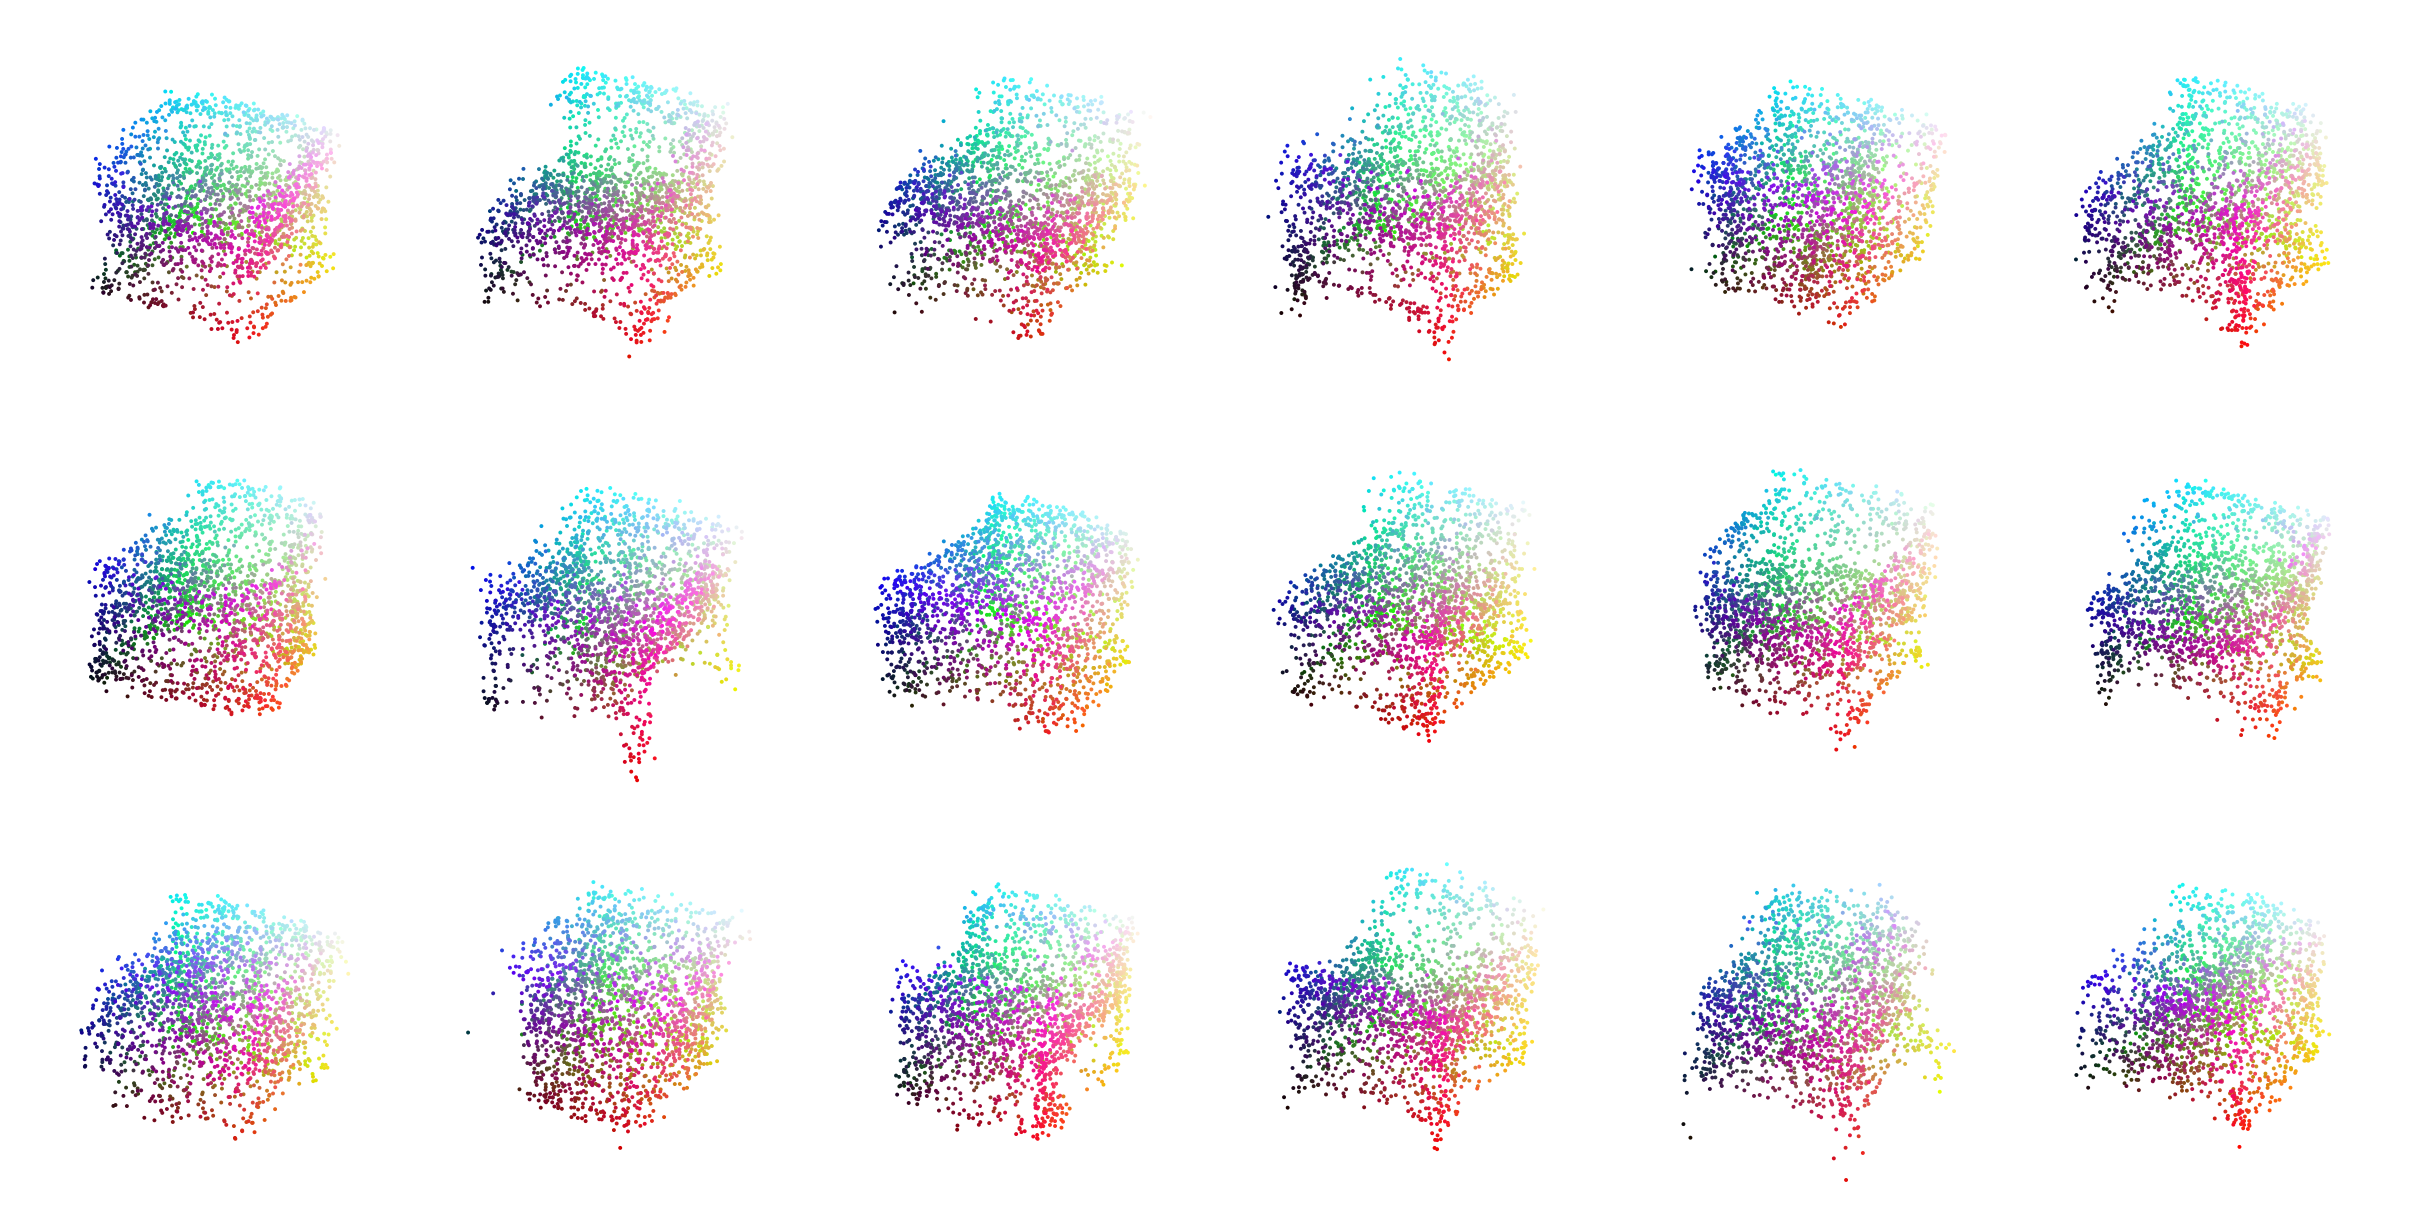

In [12]:
if use_blender:
    viz.multiscatter_bp(samples, layout=layout)
else:
    viz.multiscatter(samples, layout=layout)

plt.savefig("figures/model_samples.png", dpi=100, bbox_inches="tight")
plt.show()